In [ ]:
import pandas as pd
import numpy as np

In [ ]:
csv_list = ['dataset/P01/ZEPHYR/2021_12_03-16_44_37_Summary.csv', 
            'dataset/P02/ZEPHYR/2021_11_25-16_51_54_Summary.csv',
            'dataset/P03/ZEPHYR/2021_11_26-16_07_33_Summary.csv', 
            'dataset/P04/ZEPHYR/2021_11_26-18_00_34_Summary.csv',
            'dataset/P05/ZEPHYR/2021_11_29-09_15_19_Summary.csv',
            'dataset/P06/ZEPHYR/2021_11_29-10_23_54_Summary.csv',
            'dataset/P07/ZEPHYR/2021_11_29-15_19_07_Summary.csv',
            'dataset/P08/ZEPHYR/2021_11_29-17_46_23_Summary.csv',
            'dataset/P09/ZEPHYR/2021_11_30-09_06_33_Summary.csv',
            'dataset/P10/ZEPHYR/2021_11_30-11_13_34_Summary.csv',
            'dataset/P11/ZEPHYR/2021_11_30-14_36_55_Summary.csv',
            'dataset/P12/ZEPHYR/2021_12_03-10_24_41_Summary.csv',
            'dataset/P13/ZEPHYR/2021_11_30-18_16_40_Summary.csv',
            'dataset/P14/ZEPHYR/2021_12_01-15_03_55_Summary.csv',
            'dataset/P15/ZEPHYR/2021_12_01-10_46_41_Summary.csv',
            'dataset/P16/ZEPHYR/2021_12_01-18_07_37_Summary.csv',
            'dataset/P17/ZEPHYR/2021_12_02-16_28_52_Summary.csv'
            ]

In [ ]:
df = pd.concat(map(pd.read_csv, csv_list))

In [ ]:
df.to_csv('combine.csv')

In [ ]:
df = pd.read_csv('combine.csv')
df

,Time,HR,BR,SkinTemp,Posture,Activity,PeakAccel,BatteryVolts,BatteryLevel,BRAmplitude,...,DeviceTemp,StatusInfo,LinkQuality,RSSI,TxPower,CoreTemp,AuxADC1,AuxADC2,AuxADC3,Ext.Status
0,03/12/2021 16:44:37.445,65,10.0,-3276.8,-1,0.66,1.73,4.174,95,0,...,24.9,688,255,-128,-128,6553.5,416,420,499,49152
1,03/12/2021 16:44:38.445,65,10.0,-3276.8,45,0.80,1.14,4.174,95,0,...,24.9,688,255,-128,-128,6553.5,415,422,500,32768
2,03/12/2021 16:44:39.445,65,10.0,-3276.8,68,0.52,0.73,4.174,95,0,...,24.9,688,255,-128,-128,6553.5,415,421,500,32768
3,03/12/2021 16:44:40.445,65,10.0,-3276.8,75,0.35,0.86,4.174,95,0,...,24.9,688,255,-128,-128,6553.5,415,421,499,32768
4,03/12/2021 16:44:41.445,67,10.0,-3276.8,91,0.57,1.37,4.174,95,0,...,24.9,688,255,-128,-128,6553.5,415,421,500,32768
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64112,02/12/2021 17:41:43.440,0,10.0,-3276.8,-80,0.01,0.08,4.097,82,749,...,30.8,17043,254,-5,12,37.9,416,420,499,40960
64113,02/12/2021 17:41:44.440,0,10.0,-3276.8,-78,0.08,0.20,4.097,82,722,...,30.8,17043,254,0,12,37.9,415,420,499,40960
64114,02/12/2021 17:41:45.440,0,10.0,-3276.8,-72,0.14,0.19,4.097,82,737,...,30.8,17043,254,0,12,37.9,415,420,499,40960
64115,02/12/2021 17:41:46.440,0,10.0,-3276.8,-69,0.07,0.19,4.097,82,756,...,30.8,17043,254,0,12,37.9,410,410,484,40960


In [ ]:
def preprocessing(df_=[], person_id=-1):
    global csv_list

    if person_id!=-1: df = pd.read_csv(csv_list[person_id-1])
    else: df = df_.copy()

    df = df.drop(['Time', 'SkinTemp', 'BRConfidence', 'HRConfidence', 'SystemConfidence', 'GSRStatus', 'StatusInfo', 
                  'LinkQuality', 'CoreTemp', 'Ext.Status', 'BRAmplitude', 'BRNoise', 'HRV', 'ECGNoise', 
                  'TxPower', 'RSSI', 'AuxADC1', 'AuxADC2', 'AuxADC3', 'BatteryLevel', 'BatteryVolts'], axis=1) 
    #here axis=1 indicates that we are dropping columns not rows
    
    to_drop = []
    br = np.array(df['BR'])
    # print(br)
    for i in range(len(br)):
        if br[i]>50: to_drop.append(i)
    # print(to_drop)
    # print(df)
    df.drop(to_drop, axis=0, inplace=True) #dropping rows
    # print(df)
    for i in range(len(df['ECGAmplitude'])):
        df.iloc[i, 5] = df.iloc[i, 5]*10000
        # df

    return df
# this func is a preprocessing func that loads data, drops unnecessary columns,remove rows with invalid values in BR col(value>50)
#and finally multiply each row of 6th col i.e ECGAmplitude by 1000 and returns the dataframe.

In [ ]:
def kmeans(df):
    from sklearn.cluster import KMeans
    import plotly.express as px

    kmeans = KMeans(n_clusters = 3)
    kmeans.fit(df)
    labels = kmeans.labels_
    df['Labels'] = labels

    return df
#this func divides the data into 3 clusters using KMeans of scikit learn

def lda(df):
    from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
    
    labels = df['Labels']
    data = df.drop('Labels', axis=1)

    lda = LDA()
    trans_df = lda.fit_transform(data, labels)
    trans_df

    return trans_df, labels
#This function takes a DataFrame with labeled data as input, performs Linear Discriminant Analysis (LDA)
#  to reduce the dimensionality of the data, and returns the transformed data along with the original label

def plot(df, labels, clf, x_lim=(-10, 10), y_lim=(-10,10)):
    from sklearn.inspection import DecisionBoundaryDisplay
    import seaborn as sns
    import matplotlib.pyplot as plt

    df = pd.DataFrame(df, columns = ['1', '2'])
    df2 = df.copy()
    df2['Labels'] = labels

    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
    DecisionBoundaryDisplay.from_estimator(
            clf,
            df,
            cmap=plt.cm.RdYlBu,
            response_method="predict",
            xlabel = '1',
            ylabel = '2'
        )
    # print(df)
    # print(df2)
    sns.scatterplot(x='1', y='2', hue='Labels', data=df2, palette="dark")
    # sns.set_palette("bright")
    plt.xlim(x_lim[0], x_lim[1])
    plt.ylim(y_lim[0], y_lim[1])
    plt.show()

In [ ]:
df1 = preprocessing(df)
df1

,HR,BR,Posture,Activity,PeakAccel,ECGAmplitude,ROGTime,ROG,VerticalMin,VerticalPeak,LateralMin,LateralPeak,SagittalMin,SagittalPeak,DeviceTemp
0,65,10.0,-1,0.66,1.73,0.0,3,2,-1.22,-0.13,-1.60,0.80,-0.36,0.25,24.9
1,65,10.0,45,0.80,1.14,0.0,3,3,-0.61,0.00,-0.87,0.06,-1.43,-0.26,24.9
2,65,10.0,68,0.52,0.73,7.6,3,4,-0.19,-0.02,-0.21,0.20,-1.38,-0.91,24.9
3,65,10.0,75,0.35,0.86,7.6,1,0,-0.80,0.19,-0.49,0.86,-1.39,-0.18,24.9
4,67,10.0,91,0.57,1.37,7.6,1,1,-0.28,0.75,-1.46,0.34,-1.20,-0.32,24.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64112,0,10.0,-80,0.01,0.08,8.0,0,0,-0.24,-0.09,0.89,1.07,0.19,0.26,30.8
64113,0,10.0,-78,0.08,0.20,8.0,0,0,-0.40,-0.15,0.80,1.01,0.13,0.30,30.8
64114,0,10.0,-72,0.14,0.19,8.0,0,0,-0.43,-0.37,0.81,0.95,0.13,0.21,30.8
64115,0,10.0,-69,0.07,0.19,8.0,0,0,-0.43,-0.37,0.81,0.95,0.13,0.21,30.8


In [ ]:
df2 = kmeans(df1)
df2

/home/anvisa/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,HR,BR,Posture,Activity,PeakAccel,ECGAmplitude,ROGTime,ROG,VerticalMin,VerticalPeak,LateralMin,LateralPeak,SagittalMin,SagittalPeak,DeviceTemp,Labels
0,65,10.0,-1,0.66,1.73,0.0,3,2,-1.22,-0.13,-1.60,0.80,-0.36,0.25,24.9,1
1,65,10.0,45,0.80,1.14,0.0,3,3,-0.61,0.00,-0.87,0.06,-1.43,-0.26,24.9,1
2,65,10.0,68,0.52,0.73,7.6,3,4,-0.19,-0.02,-0.21,0.20,-1.38,-0.91,24.9,1
3,65,10.0,75,0.35,0.86,7.6,1,0,-0.80,0.19,-0.49,0.86,-1.39,-0.18,24.9,1
4,67,10.0,91,0.57,1.37,7.6,1,1,-0.28,0.75,-1.46,0.34,-1.20,-0.32,24.9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64112,0,10.0,-80,0.01,0.08,8.0,0,0,-0.24,-0.09,0.89,1.07,0.19,0.26,30.8,1
64113,0,10.0,-78,0.08,0.20,8.0,0,0,-0.40,-0.15,0.80,1.01,0.13,0.30,30.8,1
64114,0,10.0,-72,0.14,0.19,8.0,0,0,-0.43,-0.37,0.81,0.95,0.13,0.21,30.8,1
64115,0,10.0,-69,0.07,0.19,8.0,0,0,-0.43,-0.37,0.81,0.95,0.13,0.21,30.8,1


In [ ]:
df3, labels = lda(df2)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier as XGBoost

xgb2 = XGBoost(max_depth=5)
xgb2.fit(df3, labels)
xgb2.score(df3, labels)

0.9916364432216108

/home/anvisa/anaconda3/lib/python3.10/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(


<Figure size 640x480 with 0 Axes>

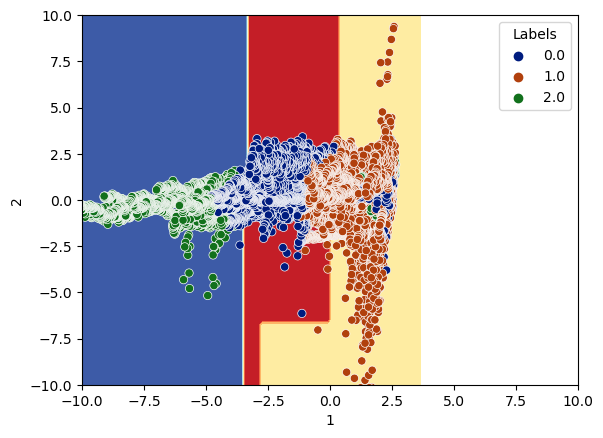

In [ ]:
plot(df3, labels, xgb2)

In [ ]:
df_ = preprocessing(person_id=15)
df_

,HR,BR,Posture,Activity,PeakAccel,ECGAmplitude,ROGTime,ROG,VerticalMin,VerticalPeak,LateralMin,LateralPeak,SagittalMin,SagittalPeak,DeviceTemp
0,65,10.0,-88,0.15,0.22,0.0,3,2,0.01,0.07,0.91,1.00,0.25,0.38,24.7
1,65,10.0,-90,0.09,0.12,0.0,0,0,0.01,0.12,0.89,0.98,0.31,0.39,24.7
2,65,10.0,-91,0.05,0.10,0.0,0,0,0.02,0.10,0.92,1.01,0.30,0.38,24.6
3,65,10.0,-91,0.03,0.07,0.0,0,0,-0.02,0.09,0.90,1.01,0.30,0.37,24.6
4,65,10.0,-91,0.03,0.09,0.0,0,0,0.00,0.13,0.92,1.00,0.26,0.38,24.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3590,0,12.0,7,0.20,0.24,8.0,0,0,-1.08,-0.83,-0.15,0.22,-0.20,0.16,29.9
3591,0,12.0,12,0.26,0.49,8.0,0,0,-1.15,-0.75,-0.16,0.25,-0.66,-0.08,29.9
3592,0,12.0,15,0.21,1.48,8.0,0,0,-2.36,-0.81,-0.04,1.09,-1.71,0.07,29.9
3593,0,13.0,18,0.23,0.46,8.0,0,1,-1.13,-0.62,-0.07,0.21,-0.69,-0.03,29.9


In [ ]:
df_2  = kmeans(df_)
df_2

/home/anvisa/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,HR,BR,Posture,Activity,PeakAccel,ECGAmplitude,ROGTime,ROG,VerticalMin,VerticalPeak,LateralMin,LateralPeak,SagittalMin,SagittalPeak,DeviceTemp,Labels
0,65,10.0,-88,0.15,0.22,0.0,3,2,0.01,0.07,0.91,1.00,0.25,0.38,24.7,0
1,65,10.0,-90,0.09,0.12,0.0,0,0,0.01,0.12,0.89,0.98,0.31,0.39,24.7,0
2,65,10.0,-91,0.05,0.10,0.0,0,0,0.02,0.10,0.92,1.01,0.30,0.38,24.6,0
3,65,10.0,-91,0.03,0.07,0.0,0,0,-0.02,0.09,0.90,1.01,0.30,0.37,24.6,0
4,65,10.0,-91,0.03,0.09,0.0,0,0,0.00,0.13,0.92,1.00,0.26,0.38,24.6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3590,0,12.0,7,0.20,0.24,8.0,0,0,-1.08,-0.83,-0.15,0.22,-0.20,0.16,29.9,0
3591,0,12.0,12,0.26,0.49,8.0,0,0,-1.15,-0.75,-0.16,0.25,-0.66,-0.08,29.9,0
3592,0,12.0,15,0.21,1.48,8.0,0,0,-2.36,-0.81,-0.04,1.09,-1.71,0.07,29.9,0
3593,0,13.0,18,0.23,0.46,8.0,0,1,-1.13,-0.62,-0.07,0.21,-0.69,-0.03,29.9,0


In [ ]:
df_2.max()

HR              209.00
BR               39.00
Posture          81.00
Activity          1.41
PeakAccel         4.09
ECGAmplitude     84.40
ROGTime           3.00
ROG             823.00
VerticalMin       0.69
VerticalPeak      1.51
LateralMin        0.92
LateralPeak       3.26
SagittalMin       0.96
SagittalPeak      3.93
DeviceTemp       31.60
Labels            2.00
dtype: float64

In [ ]:
df_.corr()

,HR,BR,Posture,Activity,PeakAccel,ECGAmplitude,ROGTime,ROG,VerticalMin,VerticalPeak,LateralMin,LateralPeak,SagittalMin,SagittalPeak,DeviceTemp,Labels
HR,1.000000,0.703108,-0.033029,0.664399,0.663977,0.388387,0.641399,-0.114657,-0.743059,0.335425,-0.476020,0.426360,-0.569039,0.289879,0.305709,-0.114976
BR,0.703108,1.000000,0.089578,0.595708,0.616238,0.123868,0.436295,0.048476,-0.693962,0.354281,-0.477424,0.248138,-0.465645,0.194295,0.459783,0.078740
Posture,-0.033029,0.089578,1.000000,0.086646,0.099688,-0.384227,-0.154884,-0.105542,-0.043657,0.245124,-0.539401,-0.633914,-0.544737,-0.619743,0.503254,-0.134525
Activity,0.664399,0.595708,0.086646,1.000000,0.979063,-0.100044,0.425363,-0.317962,-0.915526,0.844600,-0.775019,0.478936,-0.767002,0.505563,0.364824,-0.293491
PeakAccel,0.663977,0.616238,0.099688,0.979063,1.000000,-0.080742,0.435884,-0.294366,-0.948283,0.825303,-0.797159,0.474192,-0.767139,0.491529,0.361849,-0.272121
ECGAmplitude,0.388387,0.123868,-0.384227,-0.100044,-0.080742,1.000000,0.343789,0.254824,-0.107543,-0.445669,0.290950,0.298326,0.161906,0.104695,-0.266187,0.250746
ROGTime,0.641399,0.436295,-0.154884,0.425363,0.435884,0.343789,1.000000,-0.109093,-0.526714,0.149808,-0.210276,0.341968,-0.279346,0.209527,0.341709,-0.106498
ROG,-0.114657,0.048476,-0.105542,-0.317962,-0.294366,0.254824,-0.109093,1.000000,0.154944,-0.454594,0.303854,-0.115527,0.295819,-0.204175,-0.097821,0.932123
VerticalMin,-0.743059,-0.693962,-0.043657,-0.915526,-0.948283,-0.107543,-0.526714,0.154944,1.000000,-0.643021,0.691113,-0.468467,0.678970,-0.414468,-0.329372,0.136326
VerticalPeak,0.335425,0.354281,0.245124,0.844600,0.825303,-0.445669,0.149808,-0.454594,-0.643021,1.000000,-0.797723,0.252014,-0.709346,0.413434,0.384157,-0.427191


In [ ]:
df_3, labels = lda(df_2)

In [ ]:
from sklearn.model_selection import train_test_split as tts

train_data, test_data, train_labels, test_labels = tts(df_3, labels, train_size=0.8)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier as XGBoost

xgb = XGBoost(max_depth=5)
xgb.fit(train_data, train_labels)
xgb.score(test_data, test_labels)

0.9944367176634215

In [ ]:
df_3

array([[-2.58393383,  0.68043825],
       [-2.29955672,  1.36906244],
       [-2.32381904,  1.31539526],
       ...,
       [-2.62384219,  0.26946237],
       [-2.32537847,  0.28444296],
       [-2.71715238,  0.91468572]])

/home/anvisa/anaconda3/lib/python3.10/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(


<Figure size 640x480 with 0 Axes>

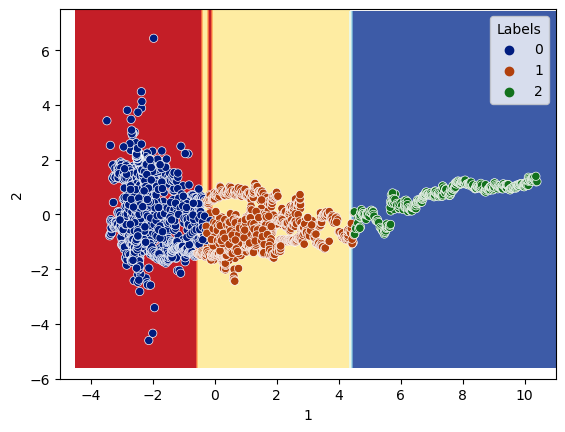

In [ ]:
plot(df_3, labels, xgb, (-5, 11), (-6, 7.5))

In [ ]:
df_3 = pd.DataFrame(df_3, columns = ['1', '2'])
df_4 = df_3.copy()
df_4['Labels'] = labels